<a href="https://colab.research.google.com/github/jessicasilvacodes/visao_computacional-pucminas/blob/main/01_opencv_JessicaSilva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Conceitos básicos com OpenCV:**

Lendo uma imagem de um diretório:

In [27]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [28]:
img = cv2.imread('lena.png', 0)

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Exibindo uma imagem

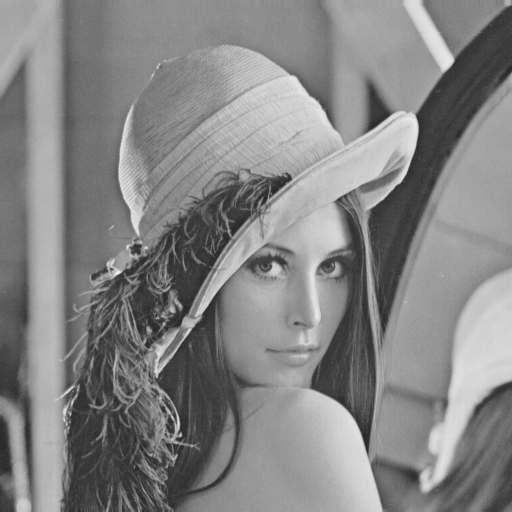

In [30]:
cv2_imshow(img)

Salvando uma imagem em disco

In [31]:
cv2.imwrite('lena_gray.png',img)

True



---


**Operações básicas: modificando o valor de um pixel**

Uma imagem é uma matriz. No OpenCV, cada pixel (posição da matriz) de uma imagem colorida está no formato BGR (Blue, Green, Red). Execute o código e veja a saída na tela.

Uma imagem é uma matriz. No OpenCV, cada pixel (posição da matriz) de uma imagem colorida está no formato BGR (Blue, Green, Red). Execute o código e veja a saída na tela.

In [32]:
# carregando a imagem em BGR
img = cv2.imread('lena.png')

px = img[50,50]
print(px)

[114 140 230]


Acessando apenas o canal “blue” do pixel

In [33]:
blue = img[50,50, 0]
print(blue)

114


Acessando apenas o canal “red” do pixel

In [34]:
red = img[50,50, 2]
print(red)

230


Modificando o valor de um único pixel

In [35]:
img[50,50] = [255, 255, 255]
print(img[50,50])

[255 255 255]


Forma otimizada de acessar pixel de uma imagem usando numpy

In [36]:
red = img.item(50,50,2)
print(red)

255


Modificando a intensidade do canal Red do pixel usando numpy


In [39]:
# img.itemset((50,50,2),100) # itemset was removed in NumPy 2.0
img[50,50,2] = 100
red = img.item(50,50,2)
print(red)

100


Retornando uma tupla de linha, coluna e número de canais de cores da imagem

In [41]:
print(img.shape)

(512, 512, 3)


Retorna o número de pixel

In [42]:
print(img.size)

786432


Imprimindo apenas o canal Red


In [43]:
b,g,r = cv2.split(img)
print(g)

[[137 137 137 ... 148 130  99]
 [137 137 137 ... 148 130  99]
 [137 137 137 ... 148 130  99]
 ...
 [ 18  18  27 ...  73  68  62]
 [ 22  22  32 ...  70  71  74]
 [ 22  22  32 ...  70  71  74]]


Modificando apenas o canal Red para 0

In [44]:
img[:,:,2] = 0
cv2.imwrite("lena_red.png", img)

True

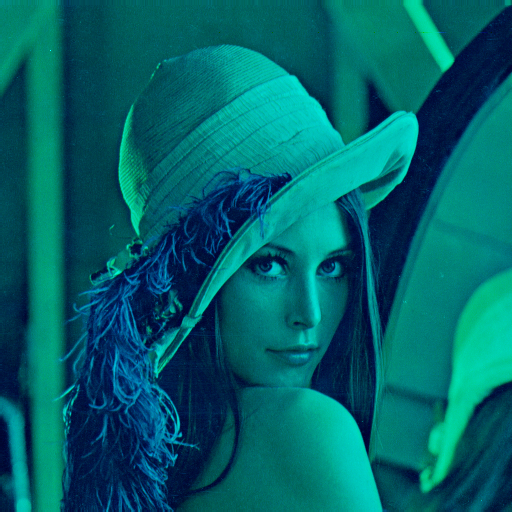

In [45]:
img_red = cv2.imread("lena_red.png")
cv2_imshow(img_red)

Rotacionando a imagem em 180 graus

In [46]:
import imutils

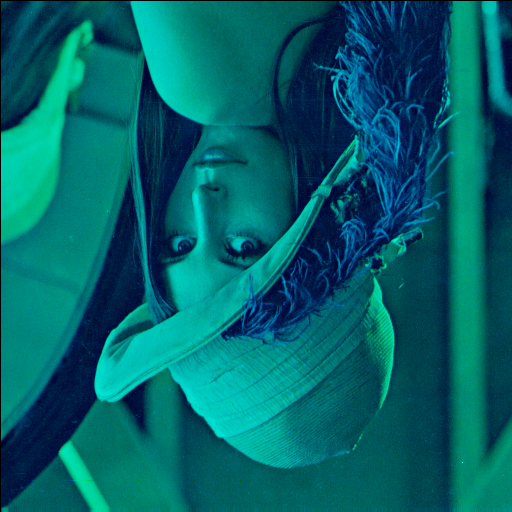

In [47]:
# rotate image 180°
rotated = imutils.rotate(img, 180)
cv2_imshow(rotated)

Redimensionando a imagem

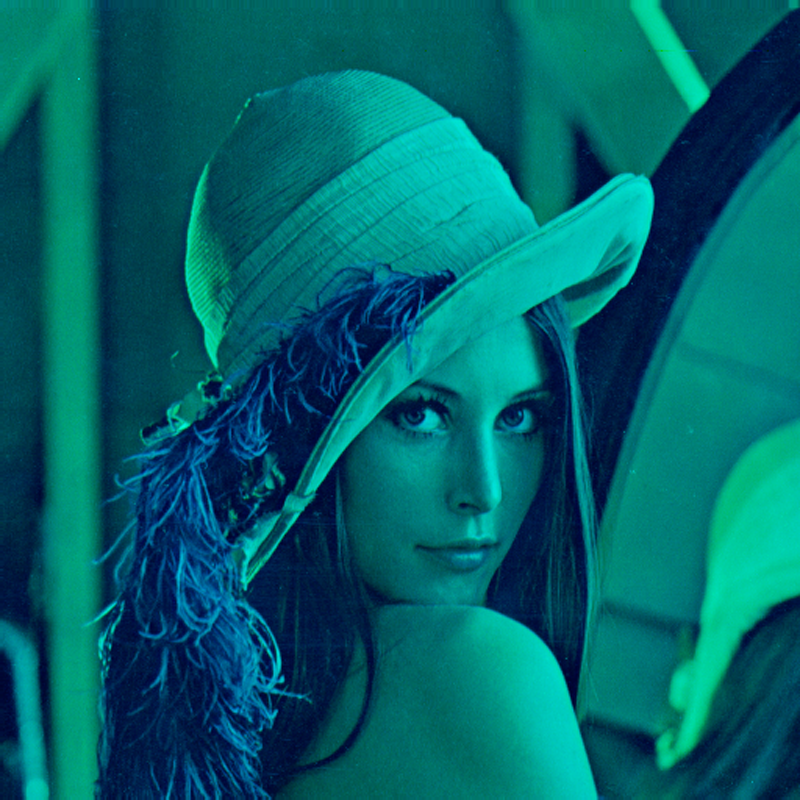

In [48]:
resized = cv2.resize(img, (800, 800), interpolation=cv2.INTER_CUBIC)
cv2_imshow(resized)

**Funções de desenho**

Desenhando uma linha

Para desenhar uma linha, você precisa passar as coordenadas inicial e final da linha.

Criando uma imagem preta e desenhando uma linha azul nos cantos superior esquerdo e inferior direito.

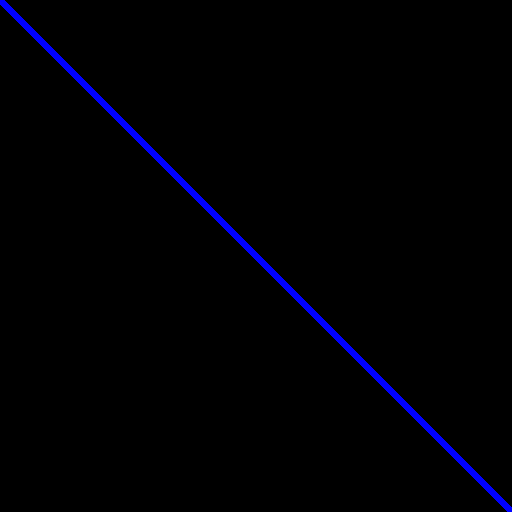

In [49]:
# Create a black image
img = np.zeros((512,512,3), np.uint8)

# Draw a diagonal blue line with thickness of 5 px
img = cv2.line(img,(0,0),(511,511),(255,0,0),5)

cv2_imshow(img)

Desenhando um retângulo

Especificamos o canto superior esquerdo e o canto inferior direito do retângulo.

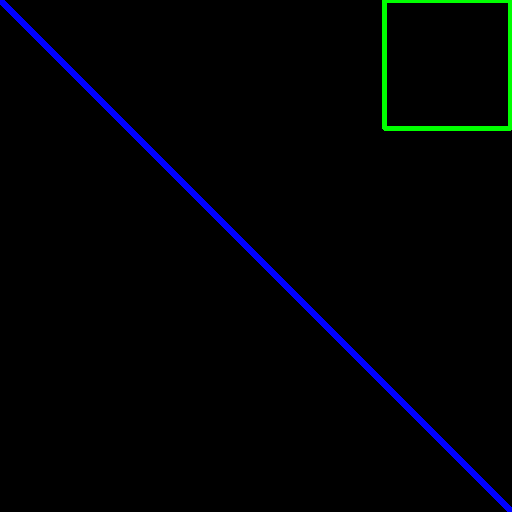

In [50]:
img = cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)

cv2_imshow(img)

**Adicionado texto em uma imagem**

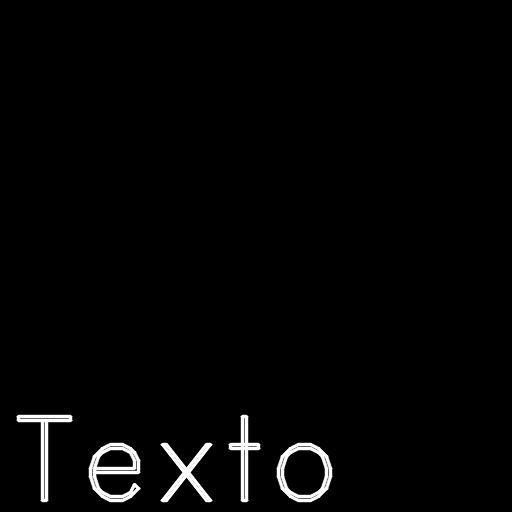

In [55]:
# Create a black image
img = np.zeros((512,512,3), np.uint8)

font = cv2.FONT_HERSHEY_DUPLEX
cv2.putText(img,'Texto',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)

cv2_imshow(img)

**Trabalhando com vídes**

Abrindo um vídeo de um arquivo

In [56]:
import os
import os.path

In [57]:
frames_dir = "frame/"

if not os.path.exists(frames_dir):
    os.makedirs(frames_dir)

In [58]:
cap = cv2.VideoCapture('cars.mp4')

# frame id
id_frame = 0

ret = True
while ret:
    # capture frame by frame
    ret, frame = cap.read()

    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        frame_path = os.path.join(frames_dir, str(id_frame) + ".jpg")

        # salva a imagem (frame) no disco
        cv2.imwrite(frame_path, gray)

        id_frame += 1

cap.release()

**Referências**

[OpenCV-Python Tutorials](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html)